In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta,date
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [ ]:
#read the data in csv
df = pd.read_csv('/content/Walmart (1).csv')

There are 6435 records in datasets it has 8 columns. There are no null records present. But, look at the Date column. We need to convert them in to datetime datatype.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#convert date field from string to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
#show first 10 rows
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


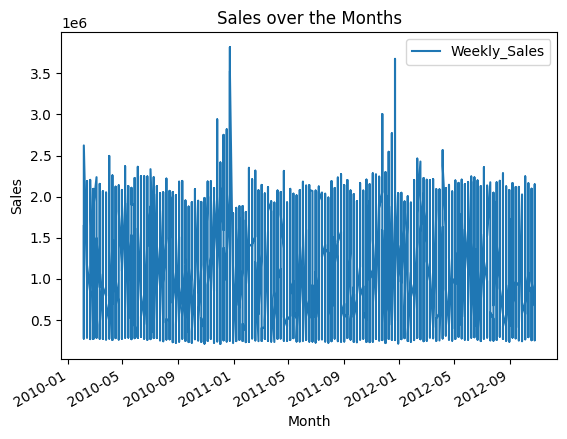

In [ ]:
# Plotting the line plot
df.plot(x='Date', y='Weekly_Sales', kind='line')

# Adding labels and title

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales over the Months')

# Display the plot
plt.show()

To forecast the monthly total sales prediction.we need to aggregrate data at the monthly level and sum up the sales column.

In [ ]:
#Represent month in date field as its first day
df['Date'] = df['Date'].dt.year.astype('str') + '-' + df['Date'].dt.month.astype('str') + '-15'
df['Date'] = pd.to_datetime(df['Date'])
#groupby date and sum the sales
df = df.groupby('Date').Weekly_Sales.sum().reset_index()

In [ ]:
df.head()

,Date,Weekly_Sales
0,2010-02-15,1.903330e+08
1,2010-03-15,1.819198e+08
2,2010-04-15,2.314124e+08
3,2010-05-15,1.867109e+08
4,2010-06-15,1.922462e+08


In [ ]:
df.tail()

,Date,Weekly_Sales
28,2012-06-15,2.406103e+08
29,2012-07-15,1.875095e+08
30,2012-08-15,2.368508e+08
31,2012-09-15,1.806455e+08
32,2012-10-15,1.843617e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          33 non-null     datetime64[ns]
 1   Weekly_Sales  33 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes


Lets plot the Data

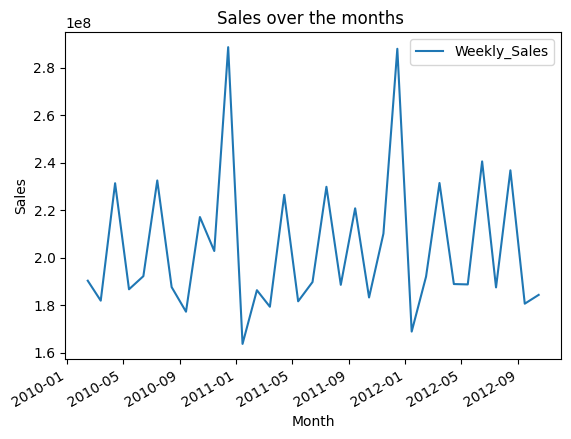

In [ ]:
# Plotting the line plot
df.plot(x='Date', y='Weekly_Sales', kind='line')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales over the months ')

# Display the plot
plt.show()

Set the frequency of the date time index as Monthly start as indicated by the data
dates.index.freq = w



In [ ]:
dates = pd.date_range(start='2010-01-15',freq='w-mon',periods=len(df))
dates[0:5]

DatetimeIndex(['2010-01-18', '2010-01-25', '2010-02-01', '2010-02-08',
               '2010-02-15'],
              dtype='datetime64[ns]', freq='W-MON')

In [ ]:
df.head()

,Date,Weekly_Sales
0,2010-02-15,1.903330e+08
1,2010-03-15,1.819198e+08
2,2010-04-15,2.314124e+08
3,2010-05-15,1.867109e+08
4,2010-06-15,1.922462e+08


In [ ]:
df.index

RangeIndex(start=0, stop=33, step=1)

In [ ]:
df.index = df['Date']
del df['Date']

In [ ]:
df.head()

,Weekly_Sales
Date,
2010-02-15,1.903330e+08
2010-03-15,1.819198e+08
2010-04-15,2.314124e+08
2010-05-15,1.867109e+08
2010-06-15,1.922462e+08


<Figure size 640x480 with 0 Axes>

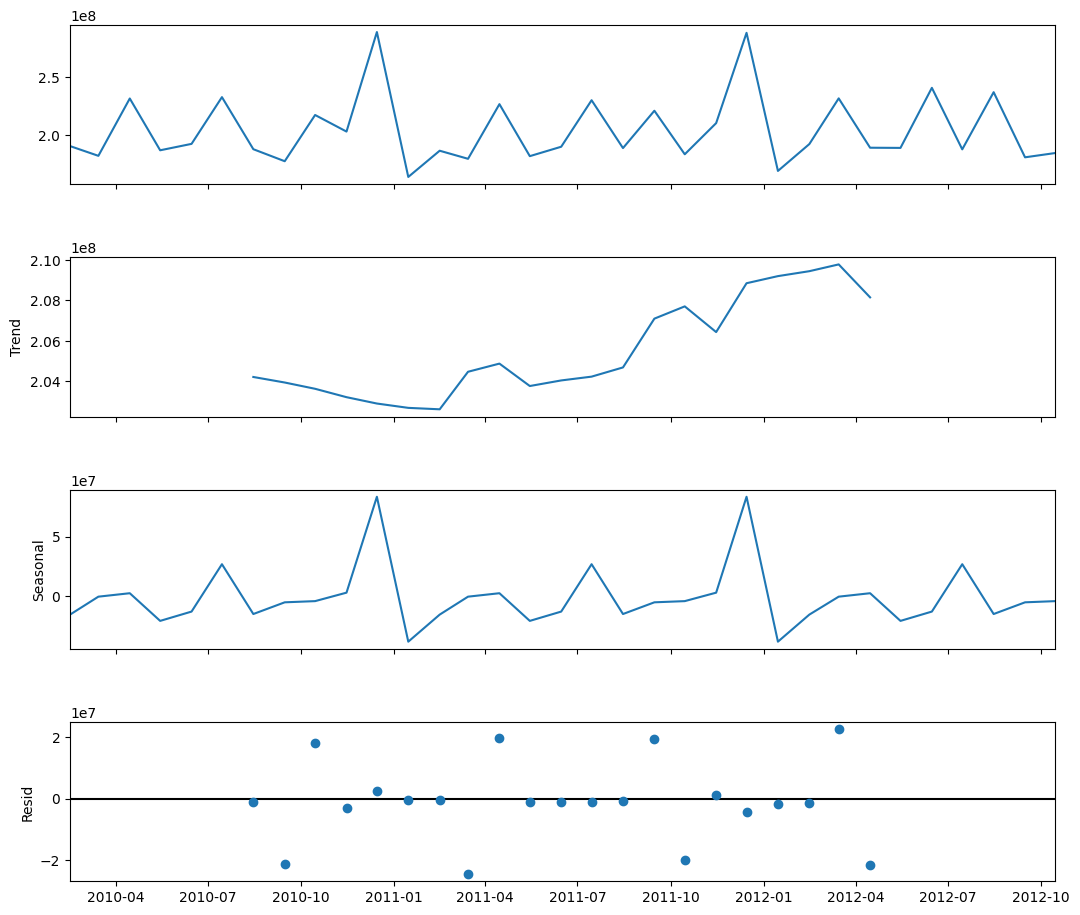

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model= 'addition' ,period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

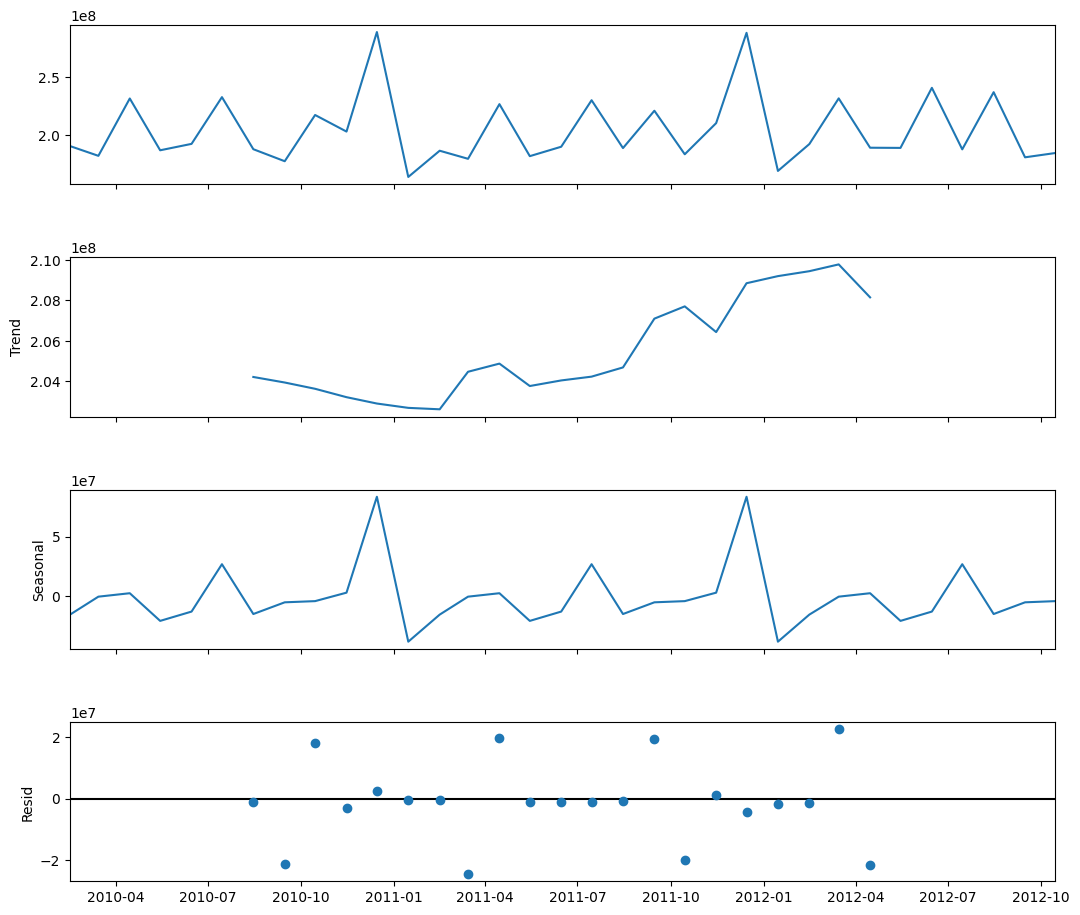

In [ ]:
decomposition_mul = seasonal_decompose(df, model= 'multiplicative', period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

The analysis reveals a noticeable surge in sales at the onset of each year. The Time Series Decomposition graphs, encompassing both Additive and Multiplicative models, illustrate an irregular component within the trend.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.164473786749464
p-value: 7.044293727364691e-08
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647


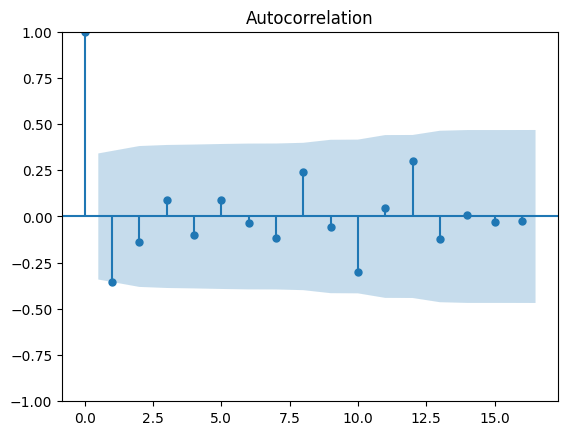

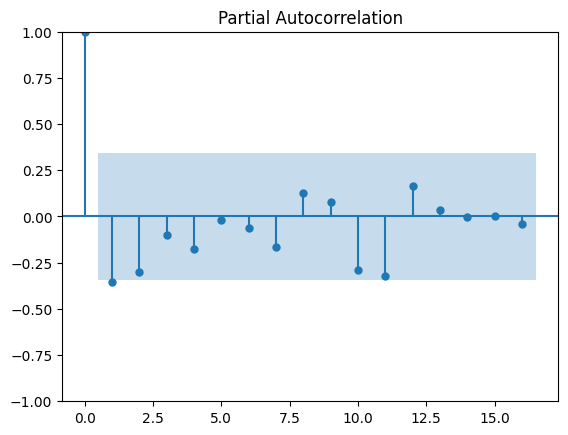

In [ ]:
plot_acf(df['Weekly_Sales'])
plt.show()
plot_pacf(df['Weekly_Sales'])
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
order=auto_arima(df['Weekly_Sales'], trace=True,suppress_warnings=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1233.736, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1233.970, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1231.650, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1228.238, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1359.226, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1237.409, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1229.590, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1342.175, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.624 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -611.119
Date:                Mon, 08 Apr 2024   AIC                           1228.238
Time:                        12:29:32   BIC                           1232.728
Sample:                             0   HQIC                          1229.749
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.052e+08   2.42e+06     84.799      0.000       2e+08     2.1e+08
ma.L1         -0.6847      0.241     -2.838      0.005      -1.158      -0.212
sigma2      9.027e+14      0.010   9.46e+16      0.000    9.03e+14    9.03e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                21.37
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.51
Prob(H) (two-sided):                  0.97   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.32e+32. Standard errors may be unstable.
"""

In [ ]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=206794361.277041, expected=210162354.870000
predicted=200538446.481962, expected=288078102.480000
predicted=154603456.530874, expected=168894471.660000
predicted=179059481.195193, expected=192063579.540000
predicted=186897062.859816, expected=231509650.490000
predicted=188950432.979223, expected=188920905.950000
predicted=203656215.992580, expected=188766479.450000
predicted=212314716.293307, expected=240610329.290000
predicted=188151738.214503, expected=187509452.400000
predicted=204061176.950486, expected=236850765.680000
predicted=186101346.668803, expected=180645544.470000
predicted=207000813.084409, expected=184361680.420000


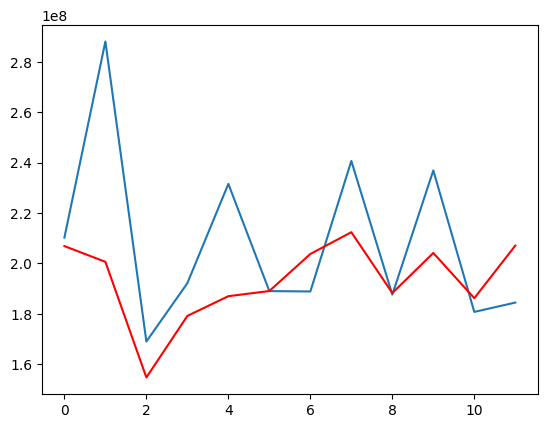

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Time Series Forecasting with Holt Winters

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
fit1 = ExponentialSmoothing(np.asarray(train['Weekly_Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.005,
 'smoothing_trend': 0.005,
 'smoothing_seasonal': 0.21321428571428575,
 'damping_trend': nan,
 'initial_level': 203476419.2724444,
 'initial_trend': 28598.956138893962,
 'initial_seasons': array([-15146530.11513891, -23977204.00388889,  22789554.46027781,
        -20980816.84388887, -13131696.25097223,  26818480.98777775,
        -15435640.31638892, -25534312.7788889 ,  14669998.67486115,
           776071.18069444,  86997215.56694447, -37845120.56138889]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
Forecasting = fit1.forecast(steps=12)

In [ ]:
idx = pd.date_range(start='2012-09-15', periods=12, freq='MS')
Forecasting = pd.Series(Forecasting,index=idx)

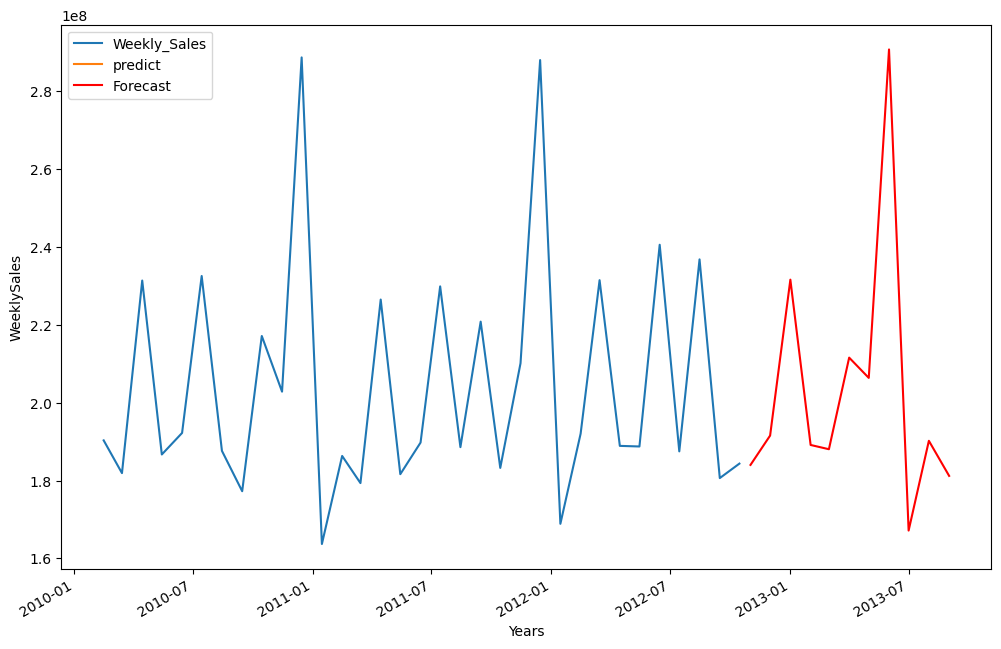

In [ ]:
axis = df.plot(label='Observed', figsize=(12, 8))
Forecasting[1:].plot(ax=axis, label='Forecast',color='r')
axis.set_xlabel('Years')
axis.set_ylabel('WeeklySales')
plt.legend(loc='upper left')
plt.show()

In [ ]:
Forecasting

2012-10-01    2.281759e+08
2012-11-01    1.840296e+08
2012-12-01    1.915676e+08
2013-01-01    2.316416e+08
2013-02-01    1.891567e+08
2013-03-01    1.880608e+08
2013-04-01    2.116015e+08
2013-05-01    2.063942e+08
2013-06-01    2.908066e+08
2013-07-01    1.671586e+08
2013-08-01    1.902242e+08
2013-09-01    1.812102e+08
Freq: MS, dtype: float64